Dataset Shape: (7043, 21)

Churn Distribution:
 Churn
No     5174
Yes    1869
Name: count, dtype: int64

Model Accuracy: 0.7874911158493249

Confusion Matrix:
 [[915 118]
 [181 193]]

Prediction: Customer will NOT churn


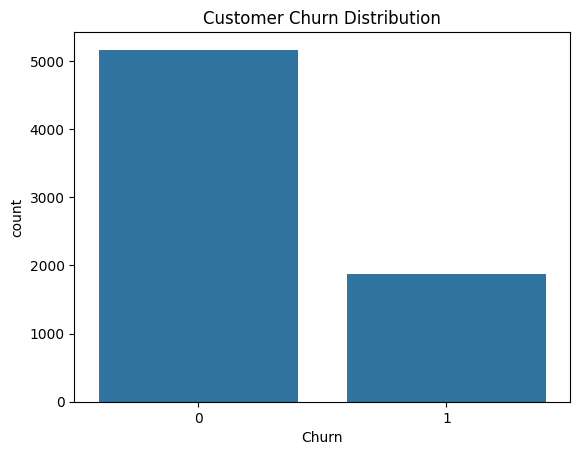

In [2]:
# ======================================
# CUSTOMER CHURN PREDICTION - FINAL CODE
# ======================================


# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# 2. Load dataset
data = pd.read_csv(r"C:\Users\HARI\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

# 3. Basic exploration
print("Dataset Shape:", data.shape)UU
print("\nChurn Distribution:\n", data['Churn'].value_counts())

# 4. Data preprocessing
data.drop('customerID', axis=1, inplace=True)
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.dropna(inplace=True)

# 5. Encode categorical features
categorical_cols = data.select_dtypes(include='object').columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# 6. Split features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# 7. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 8. Feature scaling (IMPORTANT)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 9. Model training
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# 10. Model evaluation
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nModel Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)

# 11. Sample prediction
sample = scaler.transform(X_test.iloc[0:1])
prediction = model.predict(sample)

if prediction[0] == 1:
    print("\nPrediction: Customer WILL churn")
else:
    print("\nPrediction: Customer will NOT churn")

# 12. Visualization
sns.countplot(x='Churn', data=data)
plt.title("Customer Churn Distribution")
plt.show()
